# Linear Regression

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(10,6)
tf.reset_default_graph()

/home/kilean/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Data preparation

In [2]:
# print(np.vectorize.__doc__)

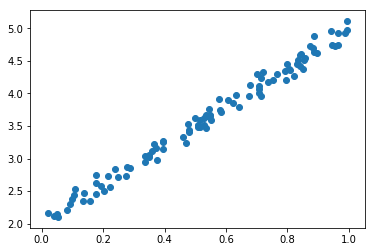

In [3]:
x_data = np.random.rand(100).astype(np.float32)
y_data = 3*x_data + 2
y_data = np.vectorize(lambda y : y + np.random.normal(loc=0.0,scale=0.1))(y_data)
plt.scatter(x_data,y_data)

# Create Graph

### Linear Model

In [4]:
a = tf.Variable(1.0,name='a')
b = tf.Variable(0.2,name='b')
y = a*x_data + b
loss = tf.reduce_mean(tf.square(y-y_data),name='loss')

### optimizer

In [5]:
optimizer = tf.train.GradientDescentOptimizer(0.5)  # 0.5 = learning_rate
train = optimizer.minimize(loss)

In [6]:
init_op  = tf.global_variables_initializer()
session = tf.Session()
session.run(init_op)

# Train

In [7]:
train_data = []
for step in range(100):
    evals = session.run([train,a,b])[1:]
    if step%5 == 0:
        print(step,evals)
        print(session.run(loss))
        train_data.append(evals)
tf.summary.FileWriter("./tensorboard/V5", session.graph);

0 [2.7121987, 3.085171]
0.87304235
5 [2.480454, 2.296805]
0.026405673
10 [2.604866, 2.227954]
0.01849268
15 [2.6960573, 2.1755013]
0.014164098
20 [2.7635365, 2.1366937]
0.0117941145
25 [2.813467, 2.107978]
0.010496516
30 [2.8504128, 2.0867305]
0.009786062
35 [2.8777506, 2.0710082]
0.009397069
40 [2.8979795, 2.0593746]
0.0091840895
45 [2.9129474, 2.0507665]
0.009067478
50 [2.9240227, 2.0443969]
0.009003632
55 [2.932218, 2.0396838]
0.008968677
60 [2.938282, 2.0361962]
0.008949542
65 [2.942769, 2.0336158]
0.008939065
70 [2.946089, 2.0317063]
0.008933321
75 [2.948546, 2.0302935]
0.008930181
80 [2.9503639, 2.029248]
0.008928461
85 [2.9517088, 2.0284743]
0.008927519
90 [2.9527042, 2.0279021]
0.008927004
95 [2.9534407, 2.0274785]
0.008926724


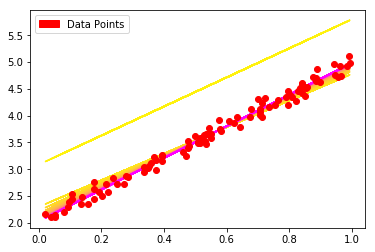

In [8]:
converter = plt.colors
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(x_data)
    line = plt.plot(x_data, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(x_data, y_data, 'ro')


green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()